In [3]:
import tensorflow as tf

g = tf.Graph()
with g.as_default():
    X = tf.placeholder(dtype=tf.float32,
                      shape=(None), name='X')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')
    
    z = w*X + b
    
    init = tf.global_variables_initializer()
    
with tf.Session(graph=g) as sess:
    sess.run(init)
    for t in [1.0, 0.6, -1.8]:
        print('X=%4.1f --> z=%4.1f'%(
            t, sess.run(z, feed_dict={X:t})))

X= 1.0 --> z= 2.7
X= 0.6 --> z= 1.9
X=-1.8 --> z=-2.9


In [6]:
import tensorflow as tf
import numpy as np

g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32,
                      shape=(None, 2, 3),
                      name='input_x')
    x2 = tf.reshape(x, shape=(-1,6), name='x2')
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')
    
with tf.Session(graph=g) as sess:
    x_array = np.arange(18).reshape(3, 2, 3)
    print('input shape:', x_array.shape)
    print('Reshaped:\n',
        sess.run(x2, feed_dict={x:x_array}))
    print('Column Sums:\n',
        sess.run(xsum, feed_dict={x:x_array}))
    print('Column Means:\n',
        sess.run(xmean, feed_dict={x:x_array}))

input shape: (3, 2, 3)
Reshaped:
 [[  0.   1.   2.   3.   4.   5.]
 [  6.   7.   8.   9.  10.  11.]
 [ 12.  13.  14.  15.  16.  17.]]
Column Sums:
 [ 18.  21.  24.  27.  30.  33.]
Column Means:
 [  6.   7.   8.   9.  10.  11.]


In [7]:
import tensorflow as tf
import numpy as np

X_train = np.arange(10).reshape(10,-1)
y_train = np.array([1.0,1.3,3.1,
                   2.0,5.0,6.3,
                   6.6,7.4,8.0,
                   9.0])

In [13]:
class TfLinreg(object):
    def __init__(self, x_dim, learning_rate=0.01,
                random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        
        with self.g.as_default():
            tf.set_random_seed(random_seed)
            
            self.build()
            self.init_op = tf.global_variables_initializer()
            
        
    def build(self):
        self.X = tf.placeholder(dtype=tf.float32,
                               shape=(None, self.x_dim),
                               name='x_input')
        self.y = tf.placeholder(dtype=tf.float32,
                               shape=(None),
                               name='y_input')
        print(self.X)
        print(self.y)
        
        w = tf.Variable(tf.zeros(shape=(1)),
                       name='weight')
        b = tf.Variable(tf.zeros(shape=(1)),
                       name='bias')
        print(w)
        print(b)
        
        self.z_net = tf.squeeze(w*self.X+b,
                               name='z_net')
        print(self.z_net)
        
        sqr_errors = tf.square(self.y - self.z_net,
                              name='sqr_errors')
        print(sqr_errors)
        self.mean_cost = tf.reduce_mean(sqr_errors,
                                       name='mean_cost')
        optimizer = tf.train.GradientDescentOptimizer(
                    learning_rate=self.learning_rate,
                    name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)
        

lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=.01)
        

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [14]:
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    sess.run(model.init_op)
    
    traing_costs = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost],
                          feed_dict={model.X:X_train,
                                    model.y:y_train})
        traing_costs.append(cost)
        
    return traing_costs

In [17]:
sess = tf.Session(graph=lrmodel.g)
traing_costs = train_linreg(sess, lrmodel, X_train, y_train)
traing_costs

[32.431,
 6.0113096,
 1.446125,
 0.65659344,
 0.51936322,
 0.4948352,
 0.48978764,
 0.48811454,
 0.48703355,
 0.48606348]

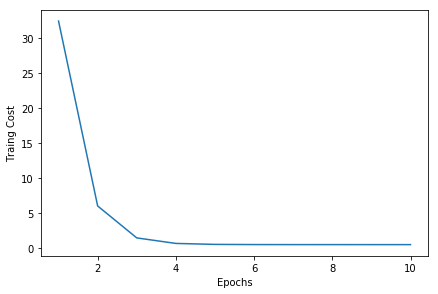

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,len(traing_costs)+1), traing_costs)
plt.tight_layout()
plt.xlabel('Epochs')
plt.ylabel('Traing Cost')

In [20]:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net,
                     feed_dict={model.X:X_test})
    return y_pred

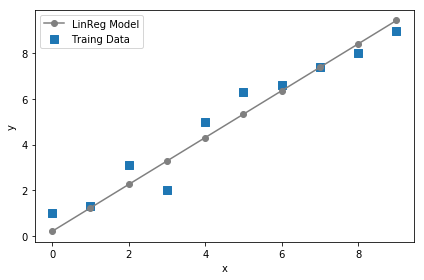

In [23]:
plt.scatter(X_train, y_train,
           marker='s', s=50,
           label='Traing Data')
plt.plot(range(X_train.shape[0]),
        predict_linreg(sess,lrmodel,X_train),
        color='gray',marker='o',
        label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()

In [34]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [35]:
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [36]:
X_train_centered = (X_train-np.mean(X_train, axis=0)/np.std(X_train))
X_test_centered = (X_test-np.mean(X_test, axis=0)/np.std(X_test))
del X_train
del X_test
print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [51]:
import tensorflow as tf
import numpy as np

n_features = X_train_centered.shape[1]
n_classes = 10
random_seed = 123
np.random.seed(random_seed)

g = tf.Graph()
with g.as_default():
    tf.set_random_seed(random_seed)
    tf_x = tf.placeholder(dtype=tf.float32,
                         shape=(None, n_features),
                         name='tf_x')
    tf_y = tf.placeholder(dtype=tf.int32,
                         shape=None, name='tf_y')
    y_onehot = tf.one_hot(indices=tf_y, depth=n_classes)
    
    h1 = tf.layers.dense(inputs=tf_x, units=50,
                        activation=tf.tanh,
                        name='layer1')
    h2 = tf.layers.dense(inputs=h1, units=50,
                        activation=tf.tanh,
                        name='layer2')
    logits = tf.layers.dense(inputs=h2, units=10,
                        activation=None,
                        name='layer3')

    
    predictions = {
        'classes' : tf.argmax(logits, axis=1,
                             name='predict_classes'),
        'probabilities' : tf.nn.softmax(logits,
                                       name='softmax_tensor')
    }
    
with g.as_default():
    cost = tf.losses.softmax_cross_entropy(
        onehot_labels=y_onehot, logits=logits)
    optimizer = tf.train.GradientDescentOptimizer(
        learning_rate=.001)
    train_op = optimizer.minimize(loss=cost)
    init_op = tf.global_variables_initializer()
    

In [52]:
def create_batch_generator(X, y, batch_size=128, shuffle=False):
    X_copy = np.array(X)
    y_copy = np.array(y)
    
    if shuffle:
        data = np.column_stack((X_copy,y_copy))
        np.random.shuffle(data)
        X_copy = data[:,:-1]
        y_copy = data[:,-1].astype(int)
    
    for i in range(0, X.shape[0], batch_size):
        yield (X_copy[i:i+batch_size, :], y_copy[i+batch_size])

In [49]:
sess = tf.Session(graph=g)
sess.run(init_op)

for epoch in range(50):
    traing_costs = []
    batch_generator = create_batch_generator(
        X_train_centered, y_train,
        batch_size=64, shuffle=True)
    for batch_X, batch_y in batch_generator:
        feed = {tf_x:batch_X, tf_y:batch_y}
        _, batch_cost = sess.run([train_op, cost], feed_dict=feed)
        traing_cost.append(batch_cost)
        
    print('-- Epoch %2d   '
         'Avg. Traing Loss: %.4f' % (
         epoch+1, np.mean(train_costs)))

InvalidArgumentError: logits and labels must be same size: logits_size=[64,10] labels_size=[1,10]
	 [[Node: softmax_cross_entropy_loss/xentropy = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](softmax_cross_entropy_loss/Reshape, softmax_cross_entropy_loss/Reshape_1)]]

Caused by op 'softmax_cross_entropy_loss/xentropy', defined at:
  File "/root/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/root/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-9d6e7b6a277a>", line 39, in <module>
    onehot_labels=y_onehot, logits=logits)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/losses/losses_impl.py", line 644, in softmax_cross_entropy
    name="xentropy")
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 1597, in softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 2385, in _softmax_cross_entropy_with_logits
    features=features, labels=labels, name=name)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): logits and labels must be same size: logits_size=[64,10] labels_size=[1,10]
	 [[Node: softmax_cross_entropy_loss/xentropy = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](softmax_cross_entropy_loss/Reshape, softmax_cross_entropy_loss/Reshape_1)]]


In [47]:
feed = {tf_x: X_test_centered}
y_pred = sess.run(predictions['classes'],feed_dict=feed)

print('Test Accuracy: %.2f%%' % (
    100*np.sum(y_pred == y_test)/y_test.shape[0]))

Test Accuracy: 7.27%


In [11]:
tf.zeros(shape=(1))

<tf.Tensor 'zeros:0' shape=(1,) dtype=float32>